# <center>ICE CREAM REVENUE</center>

### PROBLEM STATEMENT

- An ice creame busniess would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC).

### IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales_df = pd.read_csv('IceCreamData.csv')

### EDA

In [4]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


### PERFORM DATA VISUALIZATION

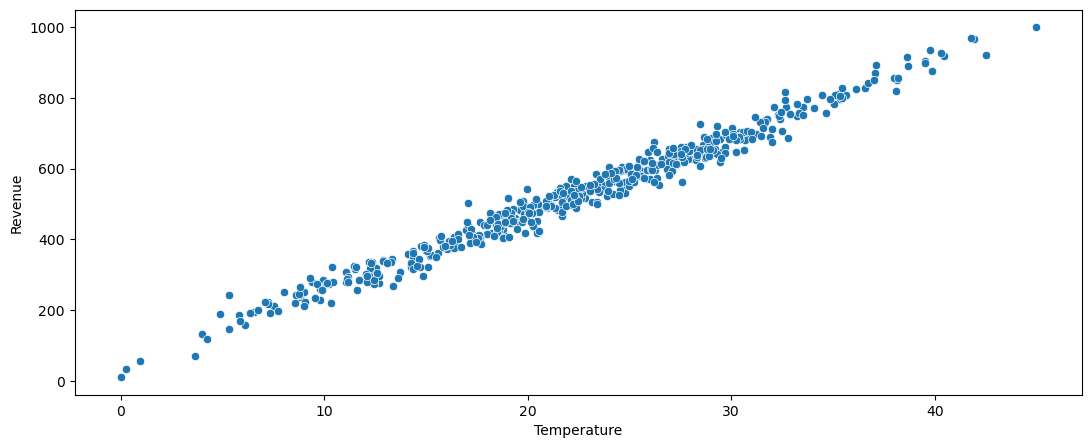

In [10]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data = sales_df, x = 'Temperature', y = 'Revenue')
plt.show()

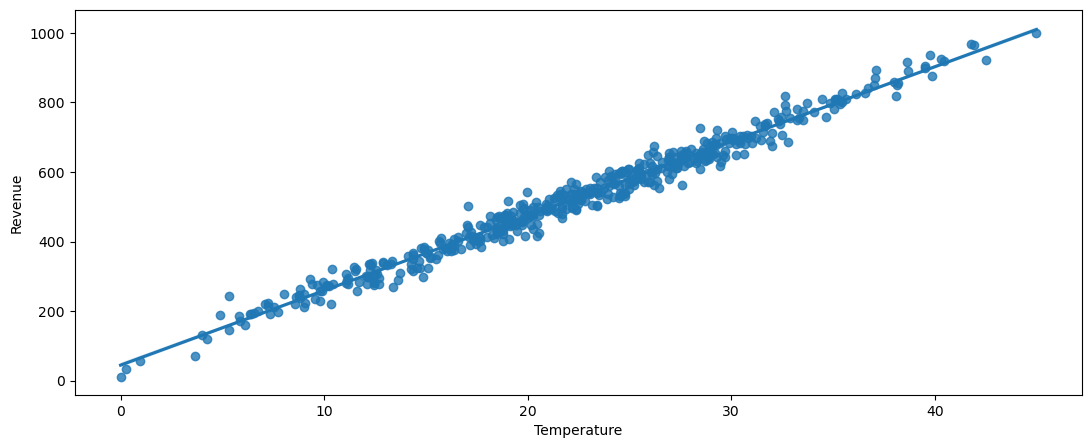

In [11]:
plt.figure(figsize=(13, 5))
sns.regplot(data = sales_df, x = 'Temperature', y = 'Revenue')
plt.show()

### CREATE TESTING AND TRAINING DATASET

In [12]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [14]:
X = sales_df['Temperature']
y = sales_df['Revenue']

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)
print(X.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(500, 1)
(500, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
xtr = X_train.shape
ytr = y_train.shape
xte = X_test.shape
yte = y_test.shape

print('The X_train shape is', xtr)
print('The y_train shape is', ytr)
print('The X_test shape is', xte)
print('The y_test shape is', yte)

The X_train shape is (400, 1)
The y_train shape is (400, 1)
The X_test shape is (100, 1)
The y_test shape is (100, 1)


### TRAIN A SIMPLE LINEAR REGRESSION MODEL

In [25]:
from sklearn.linear_model import LinearRegression
SimpleLinearRegression = LinearRegression(fit_intercept = True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [26]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[21.4213931]]
Linear Model Coeff(b) [46.11892237]


### EVALUATE TRAINED SIMPLE LINEAR REGRESSION MODEL

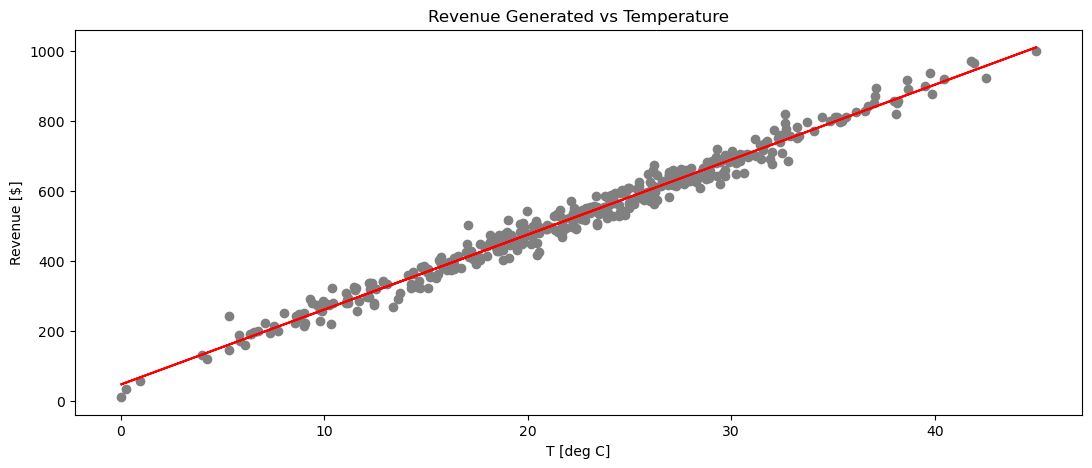

In [30]:
plt.figure(figsize =(13, 5))
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color = 'r')
plt.ylabel('Revenue [$]')
plt.xlabel('T [deg C]')
plt.title('Revenue Generated vs Temperature')
plt.show()

In [29]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
accuracy_LinearRegression

0.9733289482083061

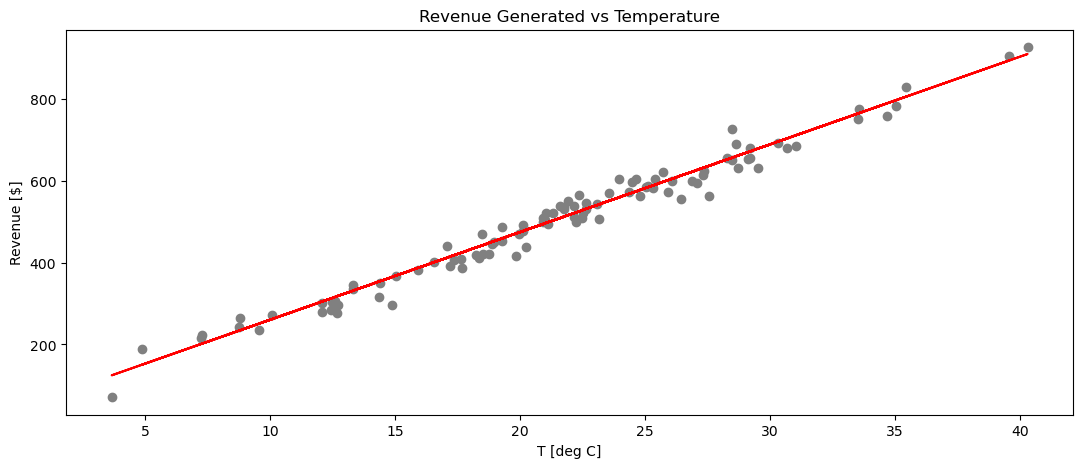

In [31]:
plt.figure(figsize =(13, 5))
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color = 'r')
plt.ylabel('Revenue [$]')
plt.xlabel('T [deg C]')
plt.title('Revenue Generated vs Temperature')
plt.show()

In [32]:
# Use the trained model to generate predictions

Temp = np.array([20])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[474.54678435]]


**Changing the split ratio to allocate 30% for testing and 70% for training.**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [37]:
xtr = X_train.shape
ytr = y_train.shape
xte = X_test.shape
yte = y_test.shape

print('The X_train shape is', xtr)
print('The y_train shape is', ytr)
print('The X_test shape is', xte)
print('The y_test shape is', yte)

The X_train shape is (350, 1)
The y_train shape is (350, 1)
The X_test shape is (150, 1)
The y_test shape is (150, 1)
